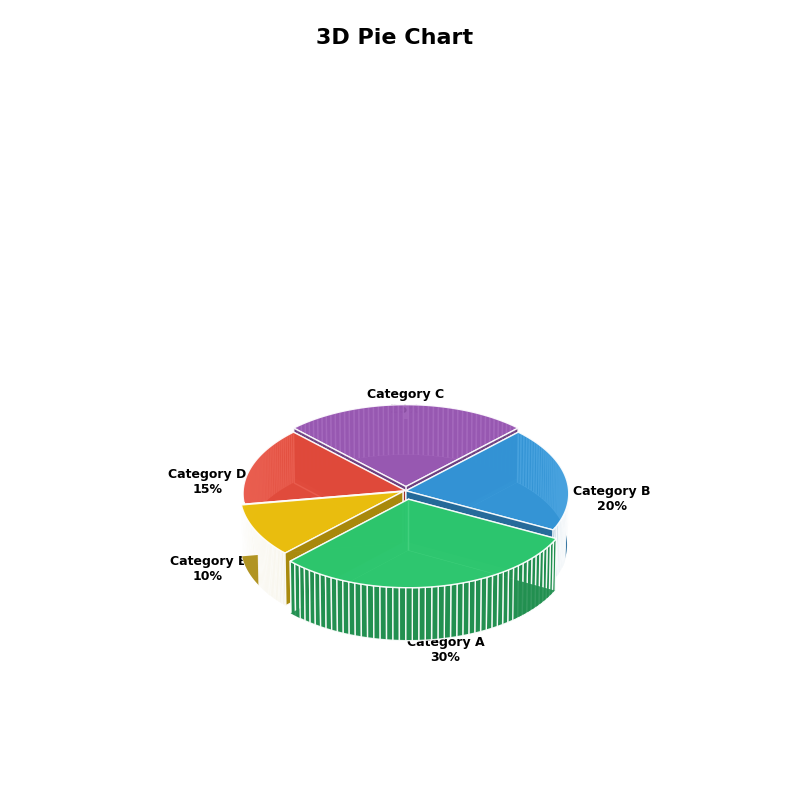

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors

# Sample data
sizes = [30, 20, 25, 15, 10]
labels = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']

# Create a professional color palette
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']

# Define the height of the pie chart
height = 0.1

# Create figure with a specific background color
plt.style.use('default')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

# Function to create points for wedges with rounded edges
def wedge_points(startangle, angle, radius=1, height=height, num_points=50):
    # Create smooth curve for the edges
    t = np.linspace(startangle, startangle + angle, num_points)
    x = np.concatenate([[0], radius * np.cos(t), [0]])
    y = np.concatenate([[0], radius * np.sin(t), [0]])
    z = np.zeros_like(x)
    return x, y, z

# Function to create gradient colors
def create_gradient(color, darkness_factor=0.7):
    rgb = mcolors.to_rgb(color)
    dark_color = tuple(c * darkness_factor for c in rgb)
    return color, dark_color

# Create the 3D pie chart
start_angle = 0
explode = [0.1, 0, 0.05, 0, 0.02]  # Explode effect for some slices

for size, color, label, exp in zip(sizes, colors, labels, explode):
    angle = 2 * np.pi * size / sum(sizes)
    
    # Calculate position with explode effect
    center_angle = start_angle + angle/2
    offset_x = exp * np.cos(center_angle)
    offset_y = exp * np.sin(center_angle)
    
    # Create gradient colors for 3D effect
    top_color, side_color = create_gradient(color)
    
    # Bottom of the wedge
    x, y, z = wedge_points(start_angle, angle)
    x += offset_x
    y += offset_y
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Poly3DCollection(verts, facecolor=side_color, alpha=0.9))
    
    # Top of the wedge
    z = np.full_like(z, height)
    verts = [list(zip(x, y, z))]
    poly = Poly3DCollection(verts, facecolor=top_color, alpha=0.9)
    poly.set_edgecolor('white')
    ax.add_collection3d(poly)
    
    # Sides of the wedge
    for i in range(len(x)-1):
        x_side = [x[i], x[i+1], x[i+1], x[i]]
        y_side = [y[i], y[i+1], y[i+1], y[i]]
        z_side = [0, 0, height, height]
        verts = [list(zip(x_side, y_side, z_side))]
        poly = Poly3DCollection(verts, facecolor=side_color, alpha=0.9)
        poly.set_edgecolor('white')
        ax.add_collection3d(poly)
    
    # Add labels with improved positioning and formatting
    label_angle = start_angle + angle/2
    label_radius = 1.3 + exp  # Adjust label position based on explode
    label_x = label_radius * np.cos(label_angle) + offset_x
    label_y = label_radius * np.sin(label_angle) + offset_y
    
    # Create label with percentage
    percentage = f'{size}%'
    label_text = f'{label}\n{percentage}'
    
    # Add label with white background for better readability
    ax.text(label_x, label_y, height/2, label_text,
            horizontalalignment='center',
            verticalalignment='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2),
            fontsize=9,
            fontweight='bold')
    
    start_angle += angle

# Improve the viewing angle
ax.view_init(elev=30, azim=45)

# Set the plot limits with some padding
limit = 1.5
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(0, height + 0.5)

# Remove axes for cleaner look
ax.set_axis_off()

# Add title with styling
plt.title('3D Pie Chart', pad=20, y=1.0, fontsize=16, fontweight='bold')

# Add a slight rotation to the plot for better 3D effect
ax.view_init(elev=30, azim=45)

# Adjust layout to prevent label clipping
plt.tight_layout()

plt.show()